# quotes.csv 카테고리 빈도 히스토그램

In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/quotes.csv")

In [4]:
df.shape

(499709, 3)

In [5]:
df.describe()

,quote,author,category
count,499708,497956,499646
unique,493789,117296,367918
top,The best way to remember your wife's birthday ...,Debasish Mridha,"education, happiness, hope, inspirational, int..."
freq,18,6601,1648


In [6]:
df.dtypes

quote       object
author      object
category    object
dtype: object

In [7]:
df.category.isna().sum()

np.int64(63)

- 카테고리 열의 데이터는 object 타입이며, 결측치가 63개 있음

In [8]:
cats = (
    df["category"]
    .dropna() # 결측치 제거
    .str.split(",") # ,를 기준으로 분리하여 리스트에 넣음
    .explode() # 리스트로 이루어진 데이터를 다수의 행으로 펼침
    .astype(str) # str 형태로 변환
    .str.strip() # 공백 제거
    .str.lower() # 소문자형로 통일
)

cats = cats.replace("", np.nan).dropna() # 공백이 있을 경우, nan으로 변환 후 dropna로 해당 데이터를 삭제

print("분리 후 토큰 수:", len(cats))
print("고유 카테고리 수:", cats.nunique())


분리 후 토큰 수: 2456286
고유 카테고리 수: 144355


In [9]:
cats.value_counts()

category
love               42415
life               40515
inspirational      29087
philosophy         15077
humor              14096
                   ...  
free press             1
who am i               1
the first thing        1
european union         1
halls                  1
Name: count, Length: 144355, dtype: int64

In [10]:
counts_10over = cats.value_counts()

In [11]:
counts_10over = counts_10over[counts_10over > 10]

In [12]:
counts_10over

category
love             42415
life             40515
inspirational    29087
philosophy       15077
humor            14096
                 ...  
tusk                11
arrant              11
blear               11
gun-rights          11
protecting          11
Name: count, Length: 16112, dtype: int64

In [13]:
# windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname= font_path).get_name()
rc("font", family = font_name)

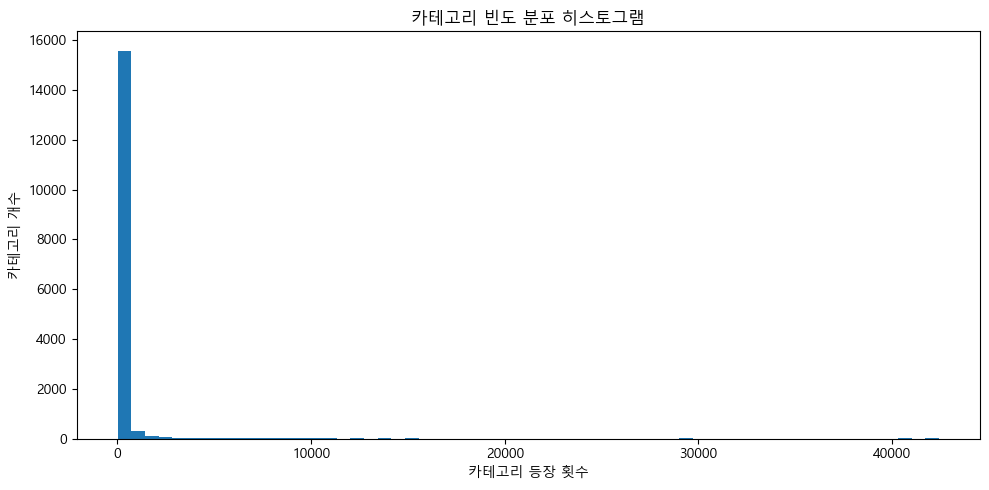

In [14]:
# x축: 카테고리 빈도(각 카테고리가 등장한 횟수)
# y축: 해당 빈도를 가진 카테고리 개수

plt.figure(figsize=(10, 5))
plt.hist(counts_10over.values, bins=60)
plt.title("카테고리 빈도 분포 히스토그램")
plt.xlabel("카테고리 등장 횟수")
plt.ylabel("카테고리 개수")
plt.tight_layout()
plt.show()

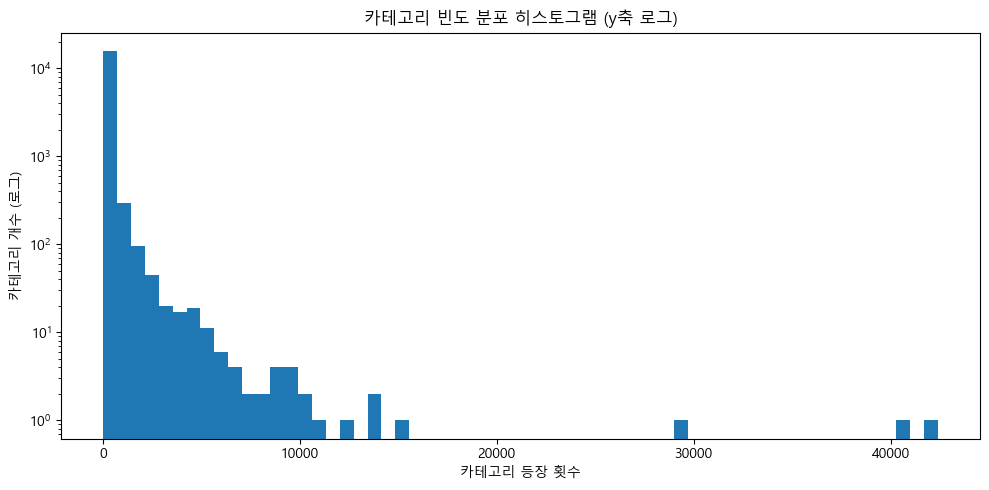

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(counts_10over.values, bins=60)
plt.yscale("log")
plt.title("카테고리 빈도 분포 히스토그램 (y축 로그)")
plt.xlabel("카테고리 등장 횟수")
plt.ylabel("카테고리 개수 (로그)")
plt.tight_layout()
plt.show()

In [16]:
counts_10over.quantile(0.75)

np.float64(68.0)

In [17]:
counts_10over.quantile(0.9)

np.float64(204.0)

In [20]:
counts_68over = counts_10over[counts_10over > 68]
counts_68over = counts_68over.to_frame().reset_index()
counts_68over.columns = ["category", "count"]
counts_68over.head()

,category,count
0,love,42415
1,life,40515
2,inspirational,29087
3,philosophy,15077
4,humor,14096


In [23]:
counts_68over.shape

(4022, 2)

In [32]:
counts_68over.to_csv("./data/over68.csv", index=False)

- 3분위 수인 68개 이상 나온 카테고리를 저장하려 했으나 깃허브에 용량 문제와 4000개의 카테고리에 일일이 임베딩을 하기 어렵다 판단하여 상위 30개만 csv 파일로 추출하기로 함

In [25]:
counts_30cat = counts_10over.head(30)
counts_30cat = counts_30cat.to_frame().reset_index()
counts_30cat.columns = ["category", "count"]
counts_30cat.to_csv("./data/cat30.csv", index=False)

In [31]:
cat30_list = counts_30cat["category"].to_list()

In [35]:
def keep_30_categories(cat_str):
    # NaN 방지
    if pd.isna(cat_str):
        return ""
    parts = str(cat_str).split(",")
    kept = []
    for p in parts:
        c = str(p).strip().lower()
        if c and c in cat30_list:
            kept.append(c)
    # 중복 제거(순서 유지)
    seen = set()
    kept_unique = []
    for k in kept:
        if k not in seen:
            kept_unique.append(k)
            seen.add(k)
    return ",".join(kept_unique)

In [36]:
df2 = df.copy()
df2["category"] = df2["category"].apply(keep_30_categories)
df2 = df2[df2["category"].str.strip() != ""]

In [37]:
df2.head(30)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"life,love,truth"
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"inspirational,life,love"
2,You know you're in love when you can't fall as...,Dr. Seuss,love
3,A friend is someone who knows all about you an...,Elbert Hubbard,"knowledge,love"
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","inspirational,love"
5,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational,love"
6,"Only once in your life, I truly believe, you f...",Bob Marley,love
7,It is better to be hated for what you are than...,"André Gide, Autumn Leaves","life,love"
8,"As he read, I fell in love the way you fall as...","John Green, The Fault in Our Stars",love
9,"The opposite of love is not hate, it's indiffe...",Elie Wiesel,"inspirational,love,philosophy"


In [38]:
df2.isna().sum()

quote         0
author      259
category      0
dtype: int64

In [39]:
df2.to_csv("./data/quotes2.csv", index=False)